 
start
Chanel 21 (ID=23) [pV] is in progress.
all_dots
plots


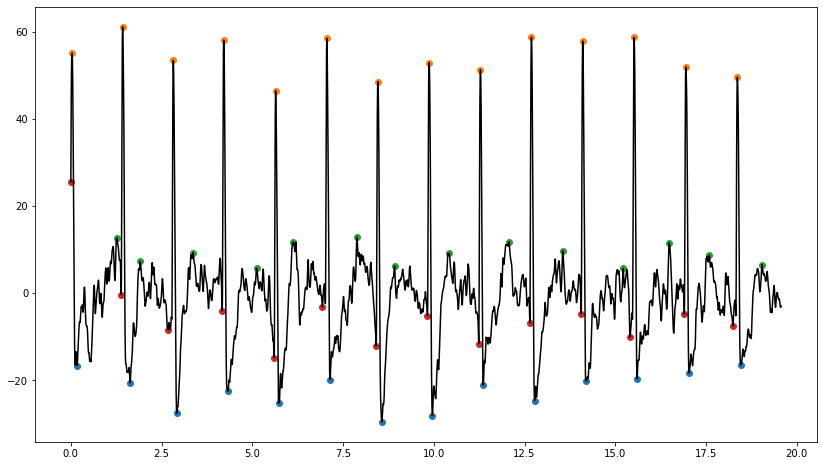

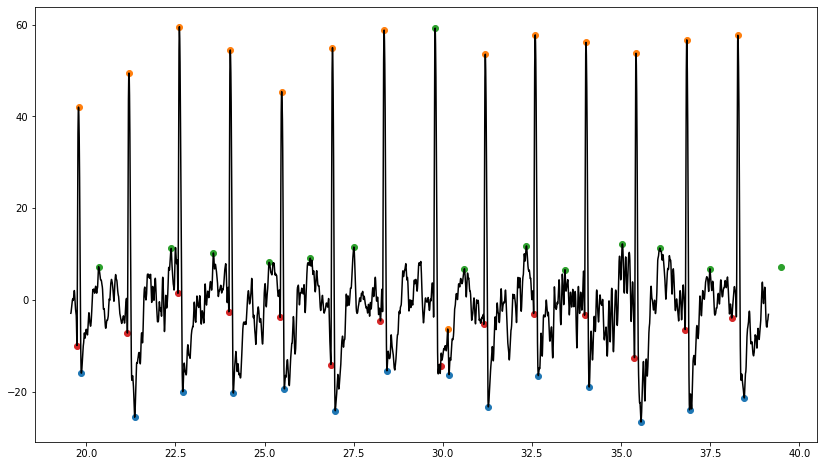

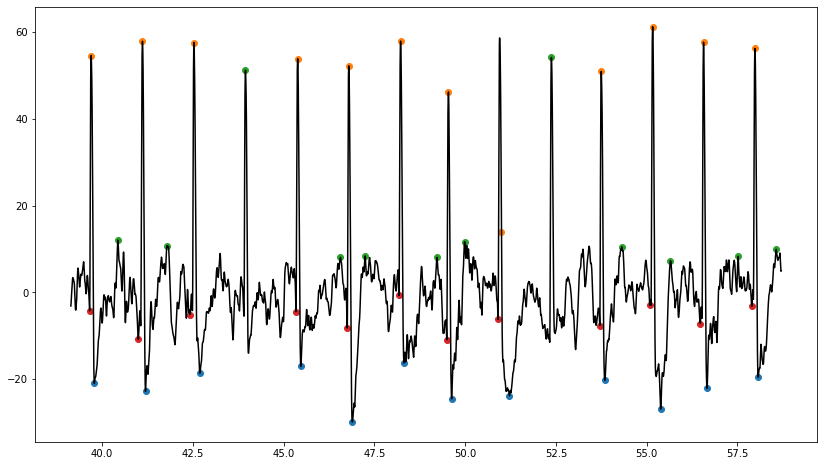

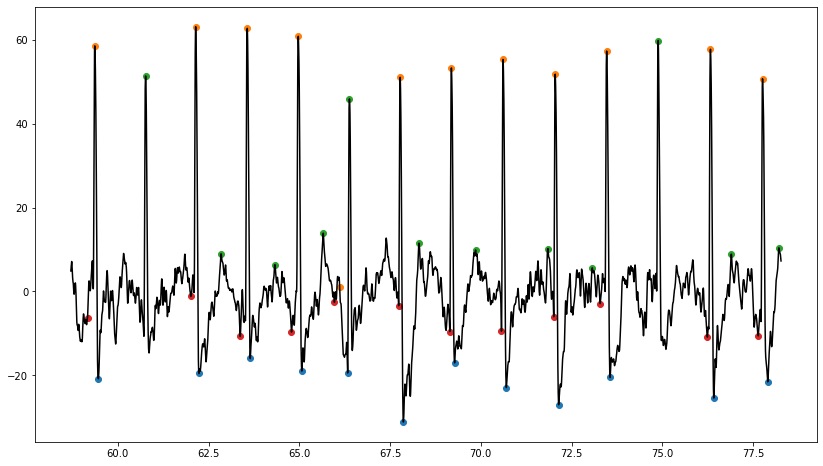

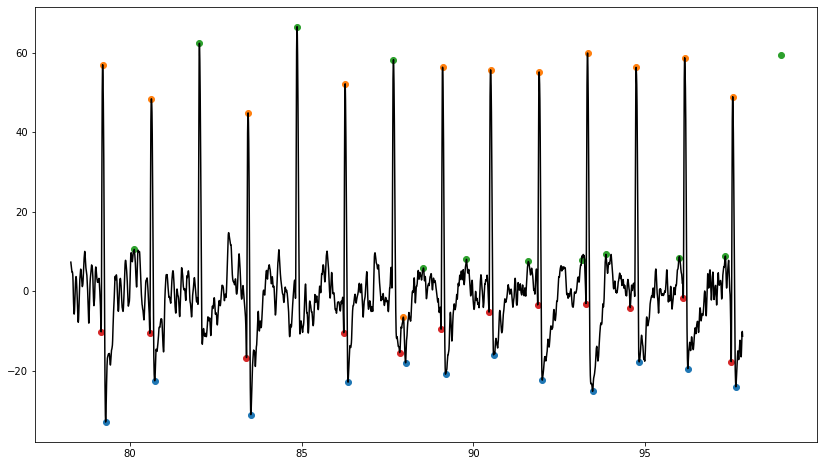

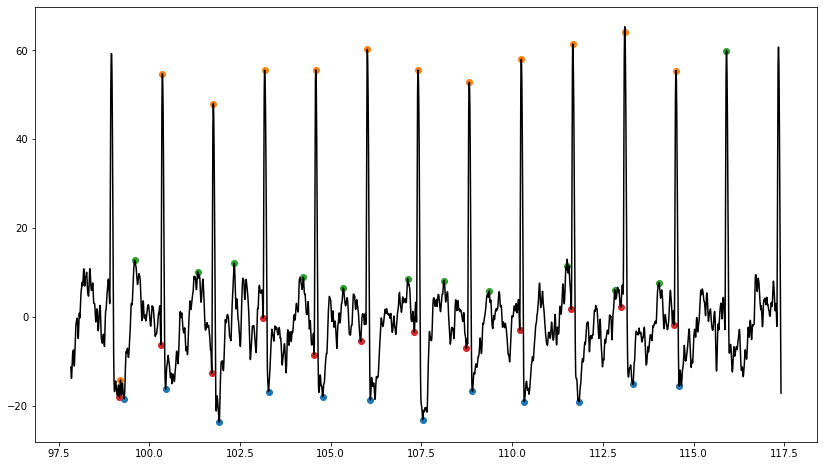

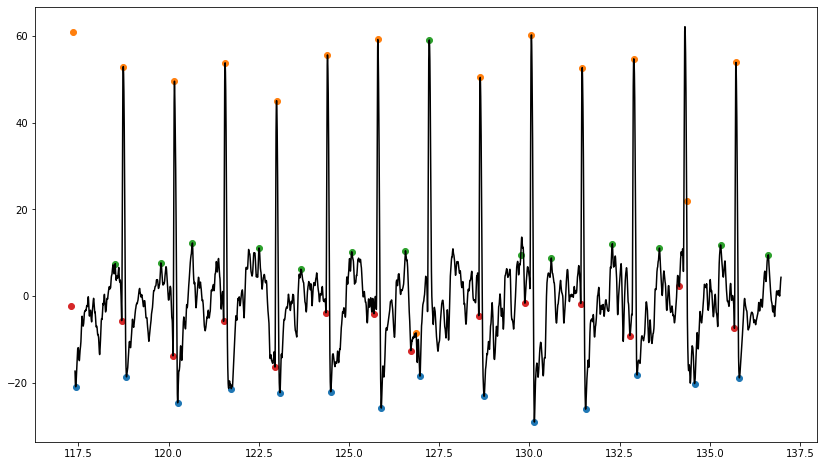

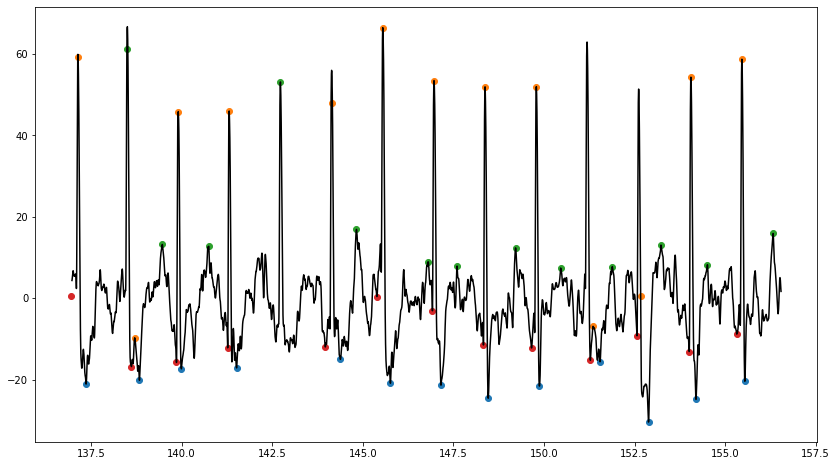

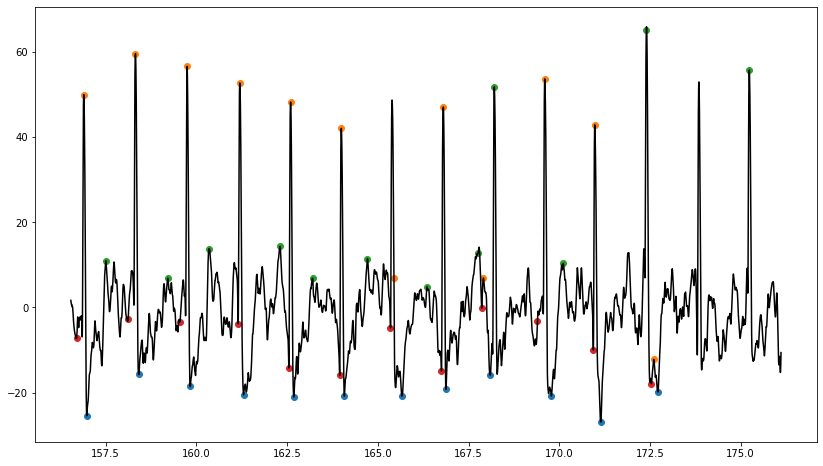

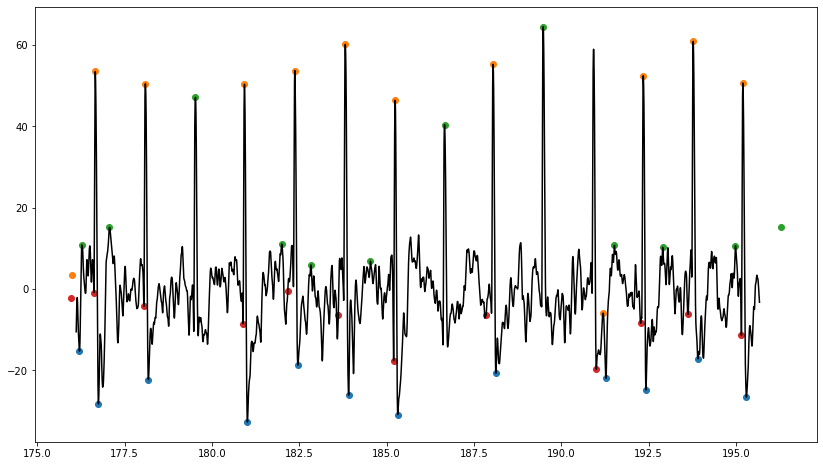

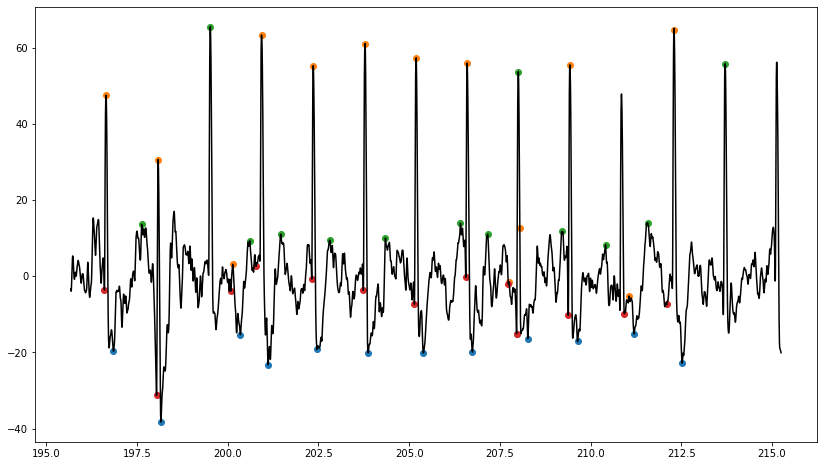

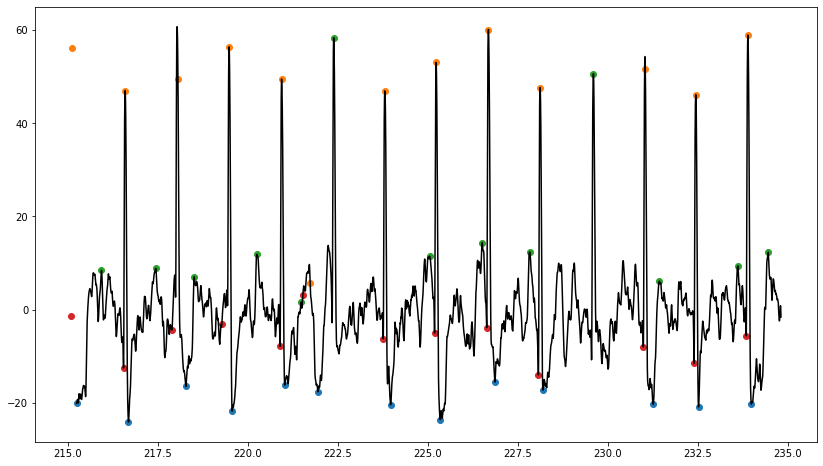

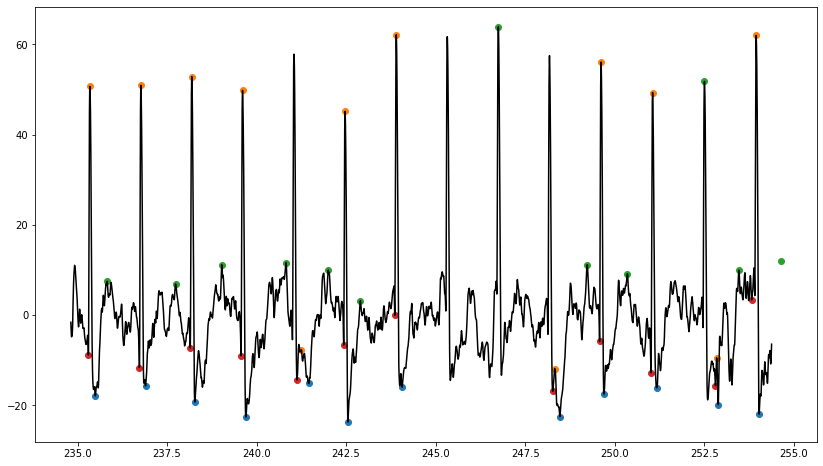

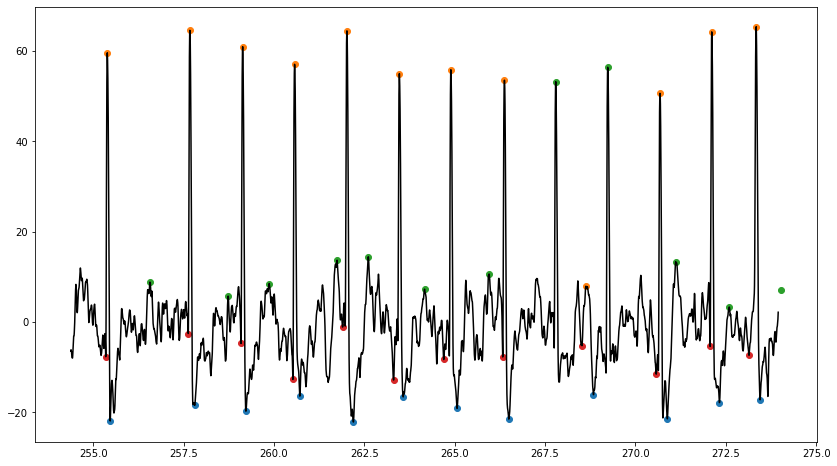

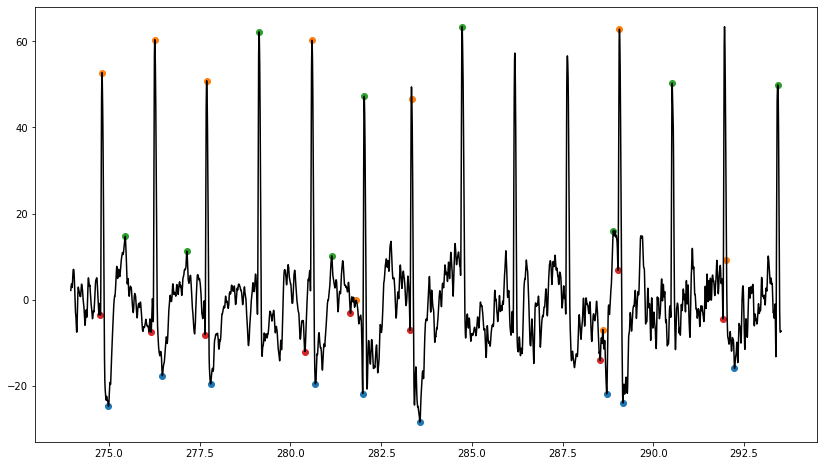

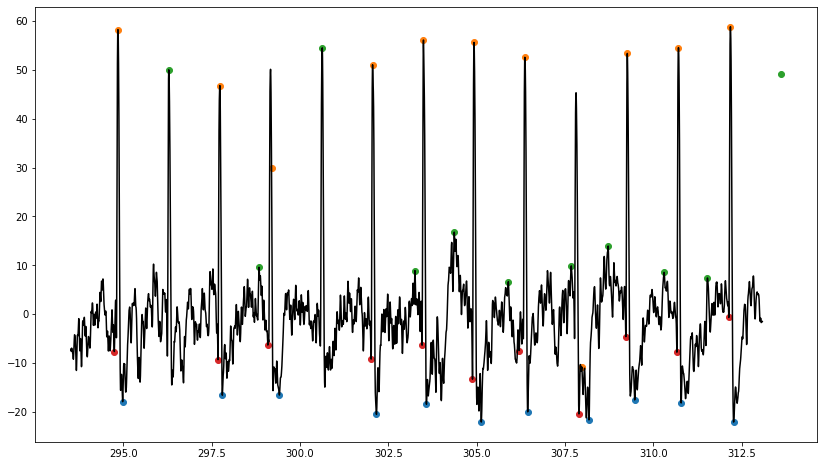

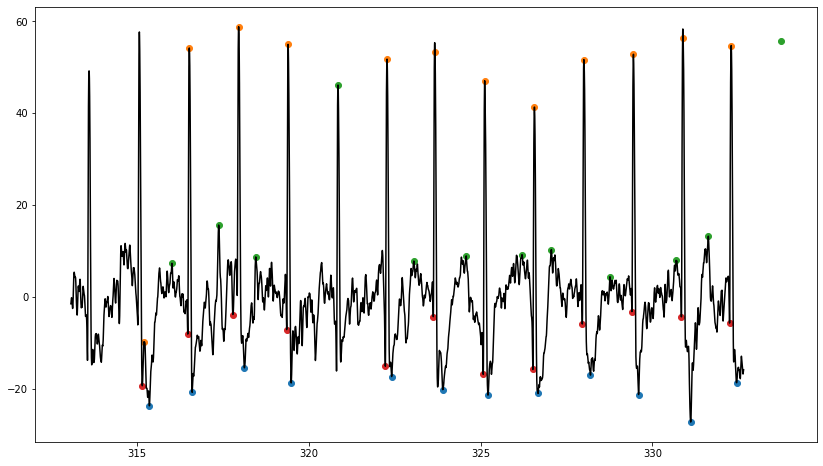

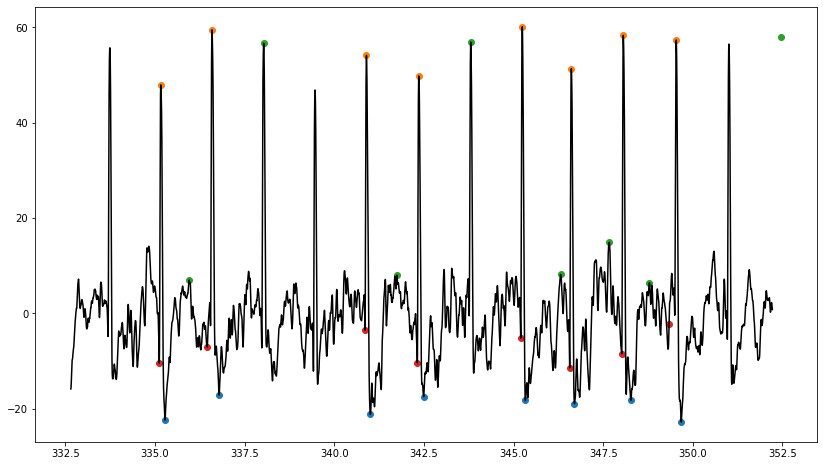

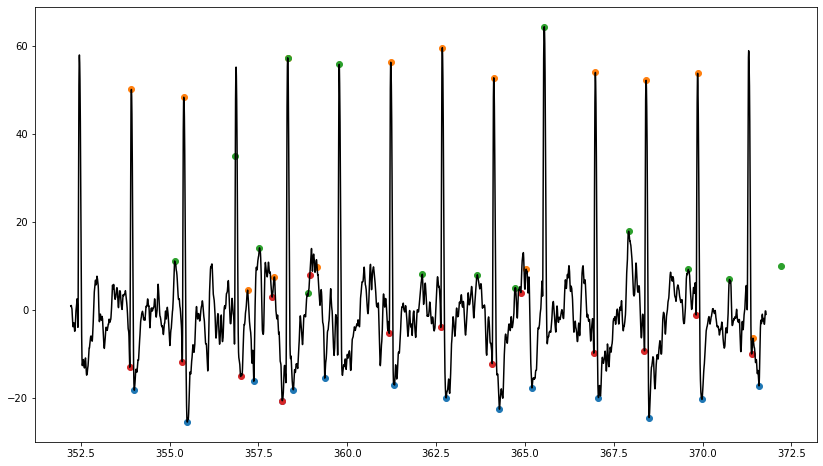

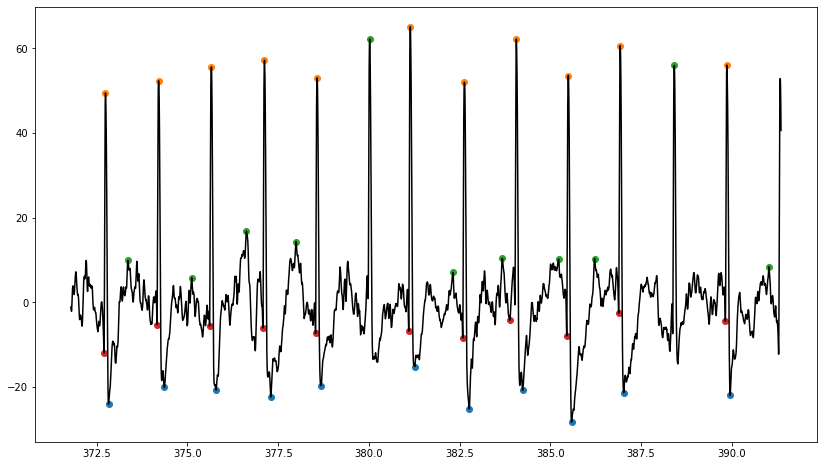

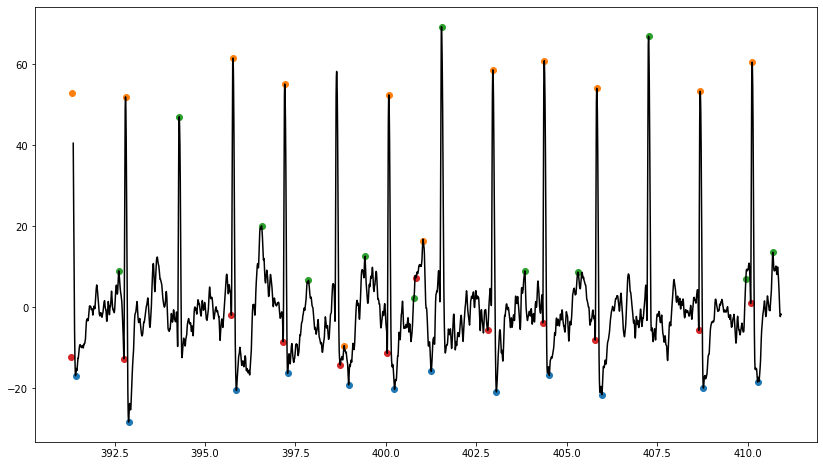

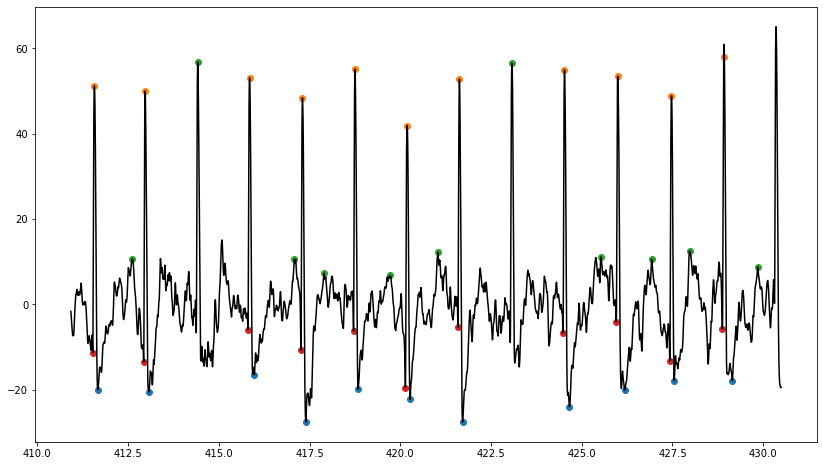

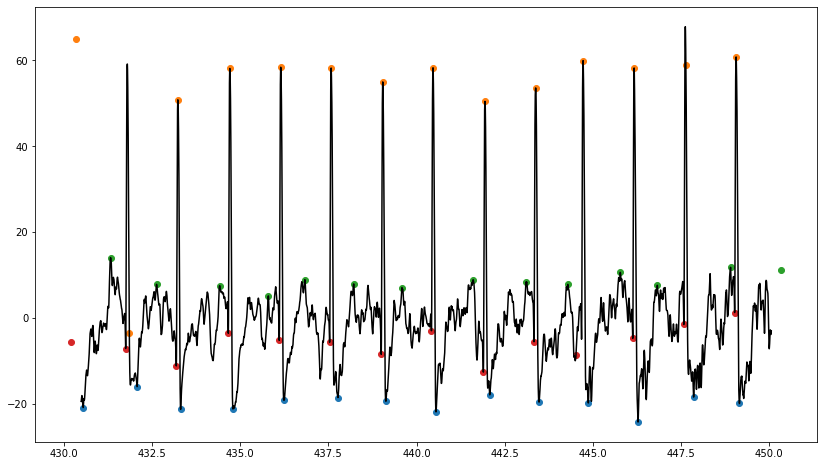

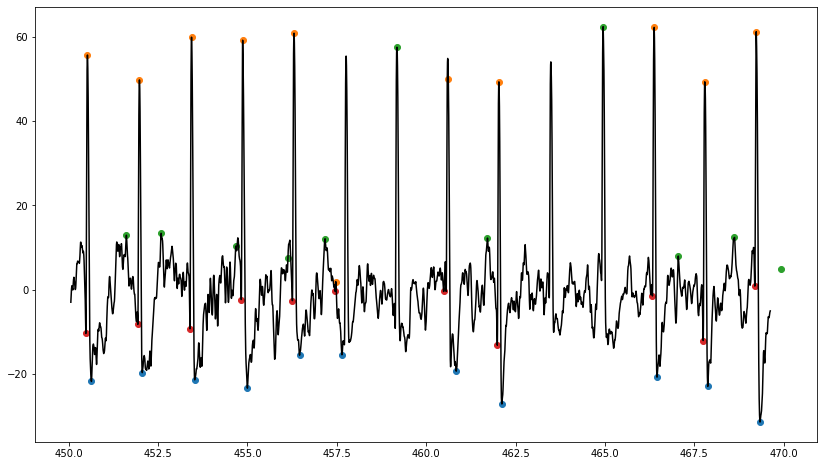

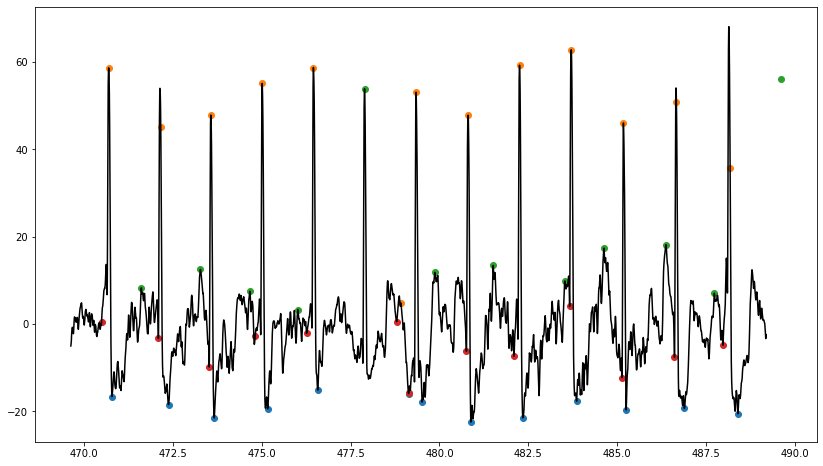

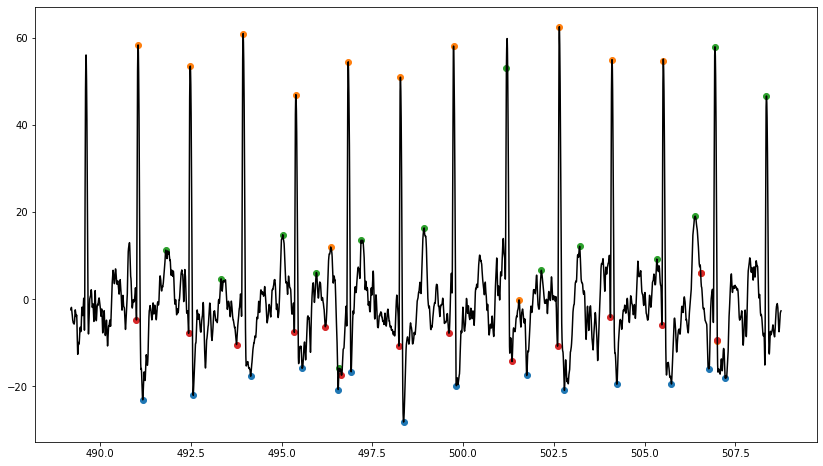

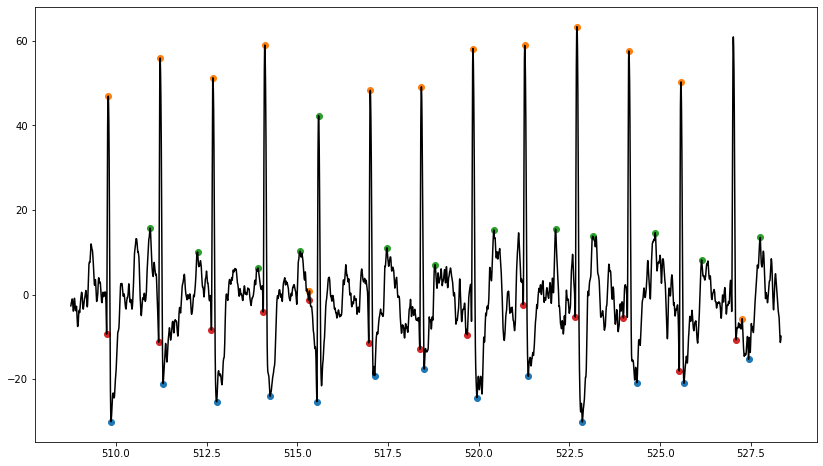

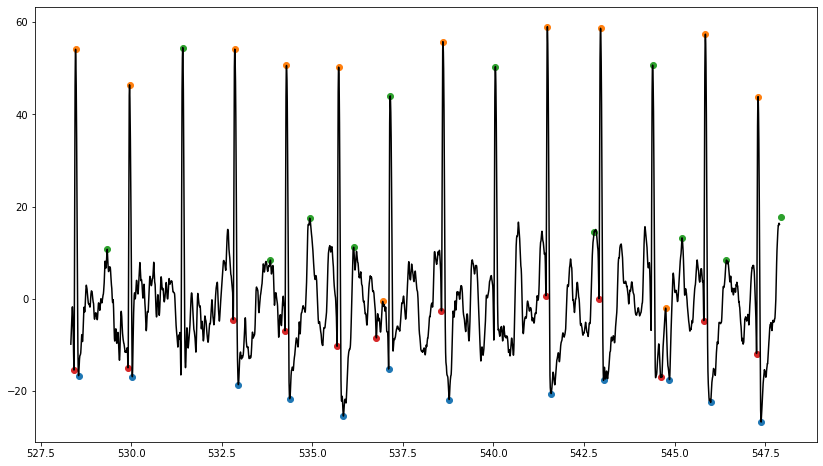

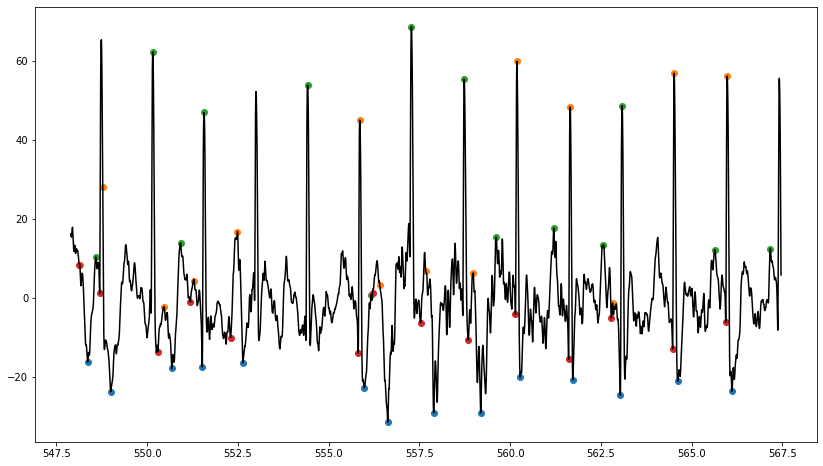

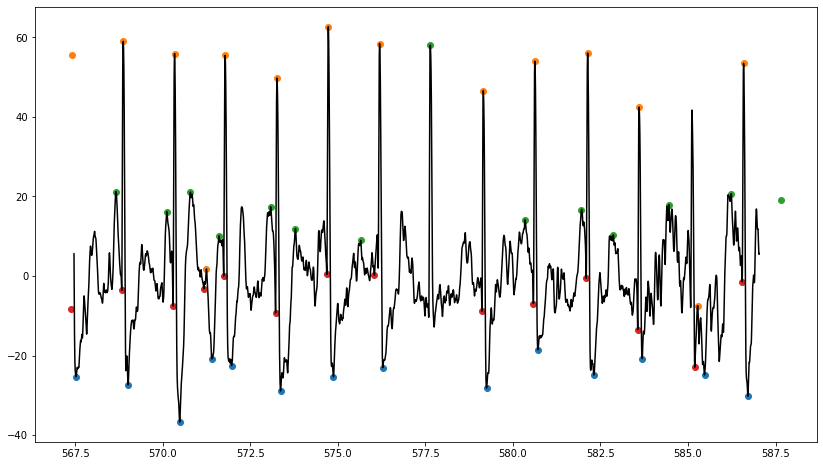

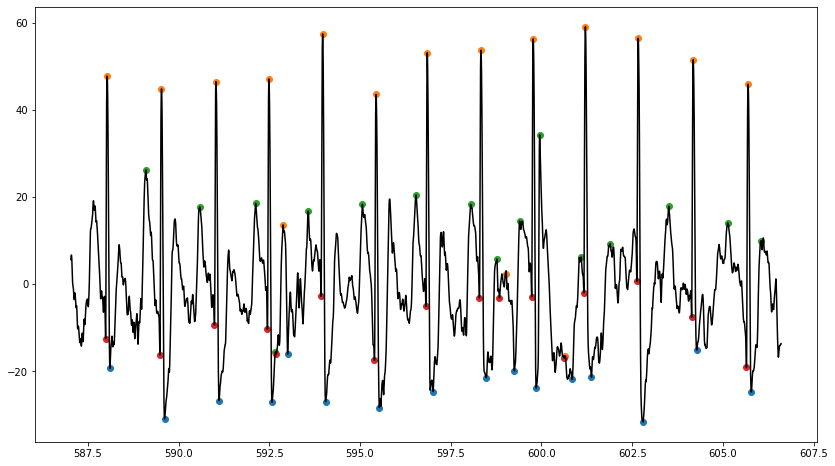

 
stop


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import time

def diff2(enter):
    d1=enter[1:]-enter[:-1]
    d2=d1[1:]-d1[:-1]
    return d2*d2

def SRfinder(data, begining_of_data_example, length_of_data_example, truncator, between_peak_min_distance_in_s, percent, treshold, prom, lenght_of_plot):
    
    chanels=data.columns.values[1:]
    timecolumn=data.columns.values[0]
    
    list_of_results1=pd.DataFrame()
    list_of_results2=pd.DataFrame()
    list_of_results3=pd.DataFrame()
    list_of_results4=pd.DataFrame()
    list_of_results5=pd.DataFrame()
    list_of_results6=pd.DataFrame()
    list_of_results7=pd.DataFrame()
    
    do_i_need_to_ask=False
    
    for chanel_name in chanels:
        print("Chanel "+chanel_name+" is in progress.")
        x=data[timecolumn].values.astype("float")/1000000
        y=data[chanel_name].values.astype("float")/1000000
        
        #filtering
       
        #b, a = scipy.signal.butter(2, 0.01)
        b, a = scipy.signal.bessel(3, 0.005)
        filtered = scipy.signal.filtfilt(b, a, y)
        y=filtered
     
        
        #formatingvalues
        y=np.round(np.real(y)*1000)/1000
        
        h=max(y)-min(y)
        lenx=len(x)
        
        #findpeaks
        pse=treshold*-1
        tr=[pse, 500]
        pr=prom
        S_peak_index=scipy.signal.find_peaks(-y, distance=10000*between_peak_min_distance_in_s, height=tr, prominence=pr)[0]
        
        S_peak_time=[]
        S_peak_value=[]
        for i in S_peak_index:
            S_peak_time.append(x[i])
            S_peak_value.append(y[i])

        print("all_dots")
        R_peak_time=[]
        R_peak_value=[]
        T_peak_time=[]
        T_peak_value=[]
        Q_peak_time=[]
        Q_peak_value=[]
        R_peak_index=[]
        T_peak_index=[]
        Q_peak_index=[]
        RT_peak_index=[]
        RT_peak_time=[]
        RT_peak_value=[]
        par=1200
        #Q_shift=900
        R_region_width=2200
        T_region_width=3000
        Q_region_width=2000
        TE_region_width=3500
        D=[]
        T=[]
        
        p=0
        for i in S_peak_index:

            Rpeakindex=max(0,i-R_region_width) + y[max(0,i-R_region_width):i].argmax()
            R_peak_index.append(Rpeakindex)
            R_peak_time.append(x[Rpeakindex])
            R_peak_value.append(y[Rpeakindex])
        
        
        
        for i in R_peak_index:
            if i-Q_region_width>0:
                Qpeakindex=max(0,i-Q_region_width) + y[max(0,i-Q_region_width):i].argmin()
            else:
                Qpeakindex=0
            Q_peak_index.append(Qpeakindex)
            Q_peak_time.append(x[Qpeakindex])
            Q_peak_value.append(y[Qpeakindex])
        p=0
        for i in range(0,len(S_peak_index)-1):
            g=Q_peak_index[i+1]-S_peak_index[i]
            
            if g>0:
                T.append(g)
            else:
                T.append(3000)
            
        T.append(3000)
        for i in S_peak_index:
            T_region_width=int(T[S_peak_index.tolist().index(i)]*0.9)
            Tpeakindex=i+ y[i:min(i+T_region_width, len(x))].argmax()
            T_peak_index.append(Tpeakindex)
            RT_peak_time.append(x[Tpeakindex])
            RT_peak_value.append(y[Tpeakindex])
        for i in range(0,len(S_peak_index)-1):
            g=Q_peak_index[i+1]-T_peak_index[i]
            if g>20:
                g=Q_peak_index[i+1]-T_peak_index[i]
            if g<1:
                D.append(10)
            if g>0:
                D.append(g)
            else:
                D.append(3200)
            
        D.append(3500)
        
        #print(len(D))
        #print(len(S_peak_index))
        
        p=0
        for i in S_peak_index:
            T_region_width=int(T[S_peak_index.tolist().index(i)]*0.9)
            Tpeakindex=i+ y[i:min(i+T_region_width, len(x))].argmax()
            TE_region_width=int(D[S_peak_index.tolist().index(i)]*0.8)
            
            b=Tpeakindex
            if b+TE_region_width<len(x)-1:
    
                TEindex=b+y[b:min(b+TE_region_width, len(x)-1)].argmin()
            else:
                TEindex=len(x)-1
            T_peak_time.append(x[Tpeakindex])
            T_peak_value.append(y[Tpeakindex])    
            
        
        Rarray=np.array(R_peak_value)
        Sarray=np.array(S_peak_value)
        Qtimearray=np.array(Q_peak_time)
        Ttimearray=np.array(T_peak_time)
        Rtimearray=np.array(R_peak_time)
        
        Peak_coordinate_array=np.array(S_peak_time)
        
        ppt= True
        if ppt:
            number_of_plots=int(np.floor(lenx*3/lenght_of_plot))+1
        
            plotsx=np.array_split(x, number_of_plots)
            plotsy=np.array_split(y, number_of_plots)
        
            print("plots")
            last_dot_index=0
        
            for i in range(number_of_plots):
                fig = plt.figure( figsize=(14,8))
                plt.plot(plotsx[i],plotsy[i], 'k')
            
                number_of_dots=sum(np.logical_and(Peak_coordinate_array<=plotsx[i][-1], Peak_coordinate_array>plotsx[i][0]))
                tempxS=S_peak_time[last_dot_index:last_dot_index+number_of_dots]
                tempyS=S_peak_value[last_dot_index:last_dot_index+number_of_dots]
                tempxR=R_peak_time[last_dot_index:last_dot_index+number_of_dots]
                tempyR=R_peak_value[last_dot_index:last_dot_index+number_of_dots]
                tempxT=T_peak_time[last_dot_index:last_dot_index+number_of_dots]
                tempyT=T_peak_value[last_dot_index:last_dot_index+number_of_dots]
                tempxQ=Q_peak_time[last_dot_index:last_dot_index+number_of_dots]
                tempyQ=Q_peak_value[last_dot_index:last_dot_index+number_of_dots]
                tempxRT=RT_peak_time[last_dot_index:last_dot_index+number_of_dots]
                tempyRT=RT_peak_value[last_dot_index:last_dot_index+number_of_dots]
                last_dot_index+=number_of_dots
                plt.scatter(tempxS, tempyS)
                plt.scatter(tempxR, tempyR)
                plt.scatter(tempxT, tempyT)
                plt.scatter(tempxQ, tempyQ)
                #plt.scatter(tempxRT, tempyRT)
        
                plt.show()
        
        list_of_results1=pd.concat([list_of_results1,pd.Series(Rarray).rename(chanel_name+' R value')], axis=1)
        list_of_results1=pd.concat([list_of_results1,pd.Series(Sarray).rename(chanel_name+' S value')], axis=1)
        list_of_results2=pd.concat([list_of_results2,pd.Series(Rarray-Sarray).rename(chanel_name+' RS amplitude')], axis=1)
        list_of_results3=pd.concat([list_of_results3,pd.Series(Peak_coordinate_array).rename(chanel_name+' peak time')], axis=1)
        list_of_results4=pd.concat([list_of_results4,pd.Series(Ttimearray-Qtimearray).rename(chanel_name+'QT time')], axis=1)
        list_of_results5=pd.concat([list_of_results5,pd.Series(Peak_coordinate_array-Rtimearray).rename(chanel_name+'RS time')], axis=1)
        list_of_results6=pd.concat([list_of_results6,pd.Series(Rtimearray-Qtimearray).rename(chanel_name+'QR time')], axis=1)
        list_of_results7=pd.concat([list_of_results7,pd.Series(Ttimearray-Peak_coordinate_array).rename(chanel_name+'ST time')], axis=1)
        
    
    return list_of_results1, list_of_results2, list_of_results3, list_of_results4, list_of_results5, list_of_results6, list_of_results7

def maincode(filename, header_value=5, begining_of_data_example=0, length_of_data_example=30000, truncator=0.005,  between_peak_min_distance_in_s=0.25, percent=0, 
           treshold =-20, prom=15, lenght_of_plot=600000):
    
    data=pd.read_csv(filename, header=header_value)
    
    result = SRfinder(data, begining_of_data_example, length_of_data_example, truncator, between_peak_min_distance_in_s, percent, treshold, prom, lenght_of_plot)

    if not (result==None):
        writer = pd.ExcelWriter(filename.split('.')[0]+"_output2"+'.xlsx', engine='xlsxwriter')
        
        
        result[0].to_excel(writer, sheet_name='SRvalues')
        result[1].to_excel(writer, sheet_name='SRamplitude')
        result[2].to_excel(writer, sheet_name='Stimes')
        result[3].to_excel(writer, sheet_name='QTinterval')
        result[4].to_excel(writer, sheet_name='RSinterval')
        result[5].to_excel(writer, sheet_name='QRinterval')
        result[6].to_excel(writer, sheet_name='STinterval')
        
        total_time = data.iat[-1,0]/1000000
        number_of_minutes=int(np.ceil(total_time/60))
        chanels=result[2].columns.values
        
        
        
        dicti={}
        for chanel_name in chanels:
            val=[]
            for i in range(number_of_minutes):
                temp=result[2][chanel_name].values
                number_of_beats=sum(np.logical_and(temp>=i*60, temp<(i+1)*60))
                val.append(number_of_beats)
            dicti[(chanel_name).split(' peak time')[0]+' beats per minute']=val
        newdf=pd.DataFrame(dicti)
        
        newdf.to_excel(writer,sheet_name='bpm')
        writer.save()
        
    return None


print(" \nstart")


maincode("eb2_tyr_run_MEA_Recording-0_(Data Acquisition (1) Electrode Raw Data1)_Analog.csv", treshold=-15, prom=25)
print(" \nstop")
